In [1]:
import pandas as pd
import glob
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
points = pd.read_csv('../points2.csv')

LLJ_files_nwf = glob.glob('../LLJ_files/nwf_done/*.csv')
LLJ_files_la100 = glob.glob('../LLJ_files/la100_done/*.csv')
LLJ_files_ca100 = glob.glob('../LLJ_files/ca100_done/*.csv')

In [3]:
# load location data for each wf zone
call_area_locs = pd.read_csv('../../turbine_locs/ca100_turbines.csv', sep=' ', header=None)
lease_area_locs = pd.read_csv('../../turbine_locs/la100_turbines.csv', sep=' ', header=None)

In [4]:
LLJ_files_nwf.sort()
LLJ_files_la100.sort()
LLJ_files_ca100.sort()

In [5]:
points = points.sort_values(by='1')

#### Make a map showing the percent difference between NWF and LA100/CA100 occurrences

In [6]:
# find the counts for each location in each simulation
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(len(loc.dropna()))
    
counts_nwf_short = [] # for comparing to call area sim
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    # subset to match ca100 times
    loc = pd.concat([loc.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                     loc.set_index('Time').loc['2020-07-01':]]).reset_index()
    counts_nwf_short.append(len(loc.dropna()))
    
counts_la = []
for f in LLJ_files_la100:
    # open the file
    loc = pd.read_csv(f)
    counts_la.append(len(loc.dropna()))
    
counts_ca = []
for f in LLJ_files_ca100:
    # open the file
    loc = pd.read_csv(f)
    counts_ca.append(len(loc.dropna()))

In [7]:
# convert to numpy array
counts_nwf = np.array(counts_nwf)
counts_nwf_short = np.array(counts_nwf_short)
counts_la = np.array(counts_la)
counts_ca = np.array(counts_ca)

In [8]:
counts_nwf.min(), counts_nwf.max(), counts_nwf.mean()

(1241, 2409, 2151.6666666666665)

In [9]:
counts_nwf_short.min(), counts_nwf_short.max(), counts_nwf_short.mean()

(370, 877, 708.5793650793651)

In [10]:
counts_la.min(), counts_la.max(), counts_la.mean()

(1237, 2324, 2024.2777777777778)

In [11]:
counts_ca.min(), counts_ca.max(), counts_ca.mean()

(357, 813, 606.3333333333334)

calcualte the percent difference between nwf and wf

In [12]:
ladiff = ((counts_nwf - counts_la) / counts_nwf)*100

In [13]:
cadiff = ((counts_nwf_short - counts_ca) / counts_nwf_short)*100

In [14]:
# fig = plt.figure(figsize=(10,8))
# projection = ccrs.PlateCarree()
# ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

# ax.coastlines()
# ax.add_feature(cfeature.LAND, facecolor='lightgrey')
# # ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

# plt.title('% difference in LLJ occurrences between NWF and LA100')
# ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

# lon_formatter = LongitudeFormatter(degree_symbol='')
# lat_formatter = LatitudeFormatter(degree_symbol='')

# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)

# m = ax.scatter(points['0'], points['1'], s=ladiff, c=ladiff, cmap=matplotlib.cm.bwr.reversed(), zorder=10, alpha=0.4, vmin=-30, vmax=30)

# plt.colorbar(m, shrink=0.67, aspect=10, label='% difference')

# handles, labels = m.legend_elements(prop="sizes", alpha=0.6)
# legend = ax.legend(handles, labels, loc="upper right", title="Sizes")

# fig.savefig('la100_occmap1.png')

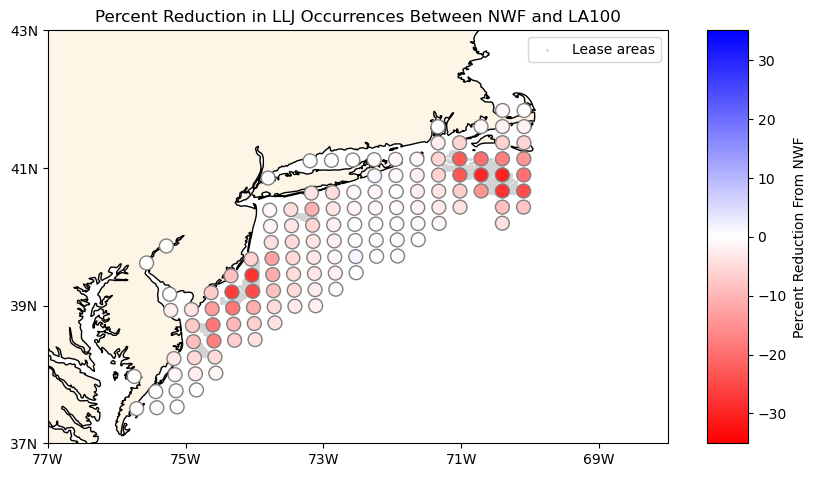

In [15]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Percent Reduction in LLJ Occurrences Between NWF and LA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=ladiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-35, vmax=35, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Reduction From NWF')

ax.legend()

fig.savefig('la100_occmap2.png', bbox_inches='tight')

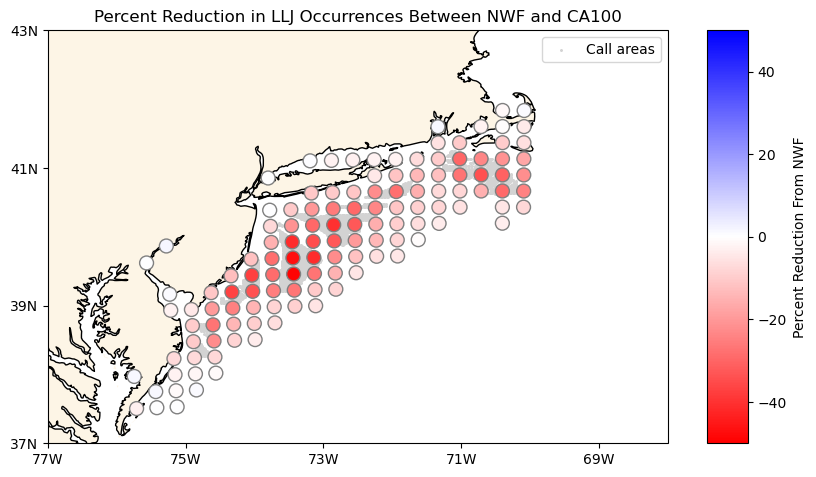

In [16]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')
# ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.2)

plt.title('Percent Reduction in LLJ Occurrences Between NWF and CA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=cadiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-50, vmax=50, 
               edgecolor='grey')

ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Call areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Reduction From NWF')

ax.legend()

fig.savefig('ca100_occmap2.png', bbox_inches='tight')

### make same map for mean nose heights

In [17]:
counts_nwf = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    counts_nwf.append(loc['Nose height (meters)'].dropna().mean())
    
counts_nwf_short = []
for f in LLJ_files_nwf:
    # open the file
    loc = pd.read_csv(f)
    loc = pd.concat([loc.set_index('Time').loc['2019-09-01':'2019-11-01'], 
                     loc.set_index('Time').loc['2020-07-01':]]).reset_index()
    counts_nwf_short.append(loc['Nose height (meters)'].dropna().mean())
    
counts_la = []
for f in LLJ_files_la100:
    # open the file
    loc = pd.read_csv(f)
    counts_la.append(loc['Nose height (meters)'].dropna().mean())
    
counts_ca = []
for f in LLJ_files_ca100:
    # open the file
    loc = pd.read_csv(f)
    counts_ca.append(loc['Nose height (meters)'].dropna().mean())

In [18]:
counts_nwf = np.array(counts_nwf)
counts_nwf_short = np.array(counts_nwf_short)
counts_la = np.array(counts_la)
counts_ca = np.array(counts_ca)

In [19]:
counts_nwf.min(), counts_nwf.max(), counts_nwf.mean()

(328.1589901790992, 473.8724860315069, 360.25571959274095)

In [20]:
counts_nwf_short.min(), counts_nwf_short.max(), counts_nwf_short.mean()

(328.1468303933129, 479.7061128977183, 358.9331017778384)

In [21]:
counts_la.min(), counts_la.max(), counts_la.mean()

(333.96388290813417, 487.0880119659616, 380.24713771362224)

In [22]:
counts_ca.min(), counts_ca.max(), counts_ca.mean()

(332.90173238563233, 553.0164279571728, 407.6848377226369)

In [23]:
ladiff = ((counts_nwf - counts_la) / counts_nwf)*100
cadiff = ((counts_nwf_short - counts_ca) / counts_nwf_short)*100

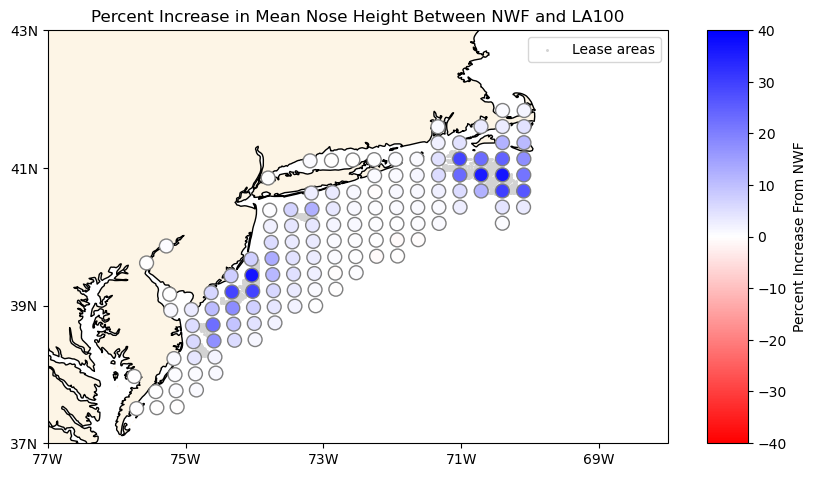

In [24]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Percent Increase in Mean Nose Height Between NWF and LA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=ladiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-40, vmax=40, 
               edgecolor='grey')

ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Lease areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Increase From NWF')

ax.legend()

fig.savefig('la100_nhmap2.png', bbox_inches='tight')

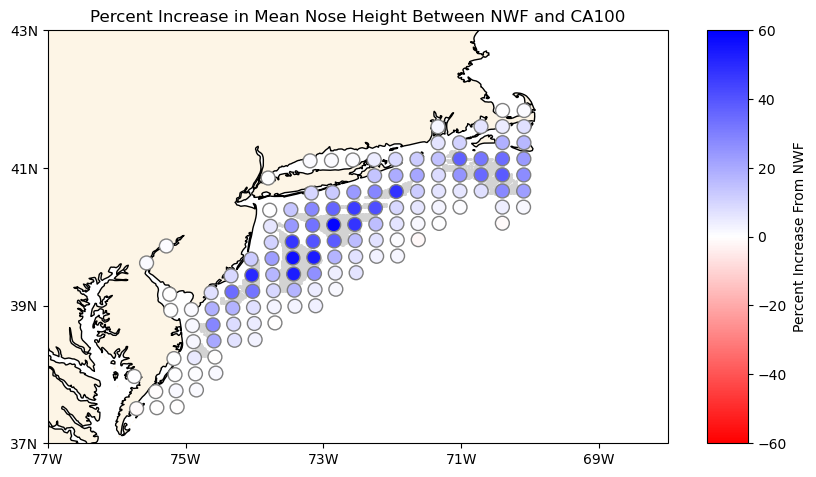

In [25]:
# VERSION WITH NO SIZING, JUST COLORS
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines(edgecolor='grey')
ax.add_feature(cfeature.LAND, facecolor='oldlace')

plt.title('Percent Increase in Mean Nose Height Between NWF and CA100')
ax.set_xticks(np.arange(-77, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(37, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

m = ax.scatter(points['0'], points['1'], 
               s=100, 
               c=cadiff*-1, 
               cmap=matplotlib.cm.bwr.reversed(), 
               zorder=10, 
               vmin=-60, vmax=60, 
               edgecolor='grey')

ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='lightgrey', marker='.', zorder=0, label="Call areas")

plt.colorbar(m, shrink=0.67, aspect=10, label='Percent Increase From NWF')

fig.savefig('ca100_nhmap2.png', bbox_inches='tight')

In [26]:
cadiff.max()

1.50954453689408